# Exploratory Analysis of NN

In [16]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file produced from the network. 

Note: This the file should contain two the training & validation scores for each of the models (i.e. regular and slow).

In [17]:
df = pd.read_csv("accuracy_metrics")

Cleaning the dataframe for readability and graphability.

In [18]:
df = df.drop(['Unnamed: 0', '0', '3'], axis=1).drop([0])

In [19]:
df = df.rename({'1':"Slow Training",'2': "Slow Validation", '4':"Reg. Train", '5':"Reg. Validation"}, axis=1)

In [20]:
df

,Slow Training,Slow Validation,Reg. Train,Reg. Validation
1,6.245766,5.698433,5.313560,4.992439
2,5.525421,5.244576,4.762711,4.639435
3,5.254234,4.992439,4.364403,4.286438
4,4.991524,4.740295,4.076271,3.782150
5,4.796608,4.740295,3.805084,3.681290
...,...,...,...,...
2996,0.008476,0.605141,0.000000,0.352997
2997,0.008476,0.605141,0.000000,0.352997
2998,0.008476,0.605141,0.000000,0.352997
2999,0.008476,0.605141,0.000000,0.352997


Graphing the plot

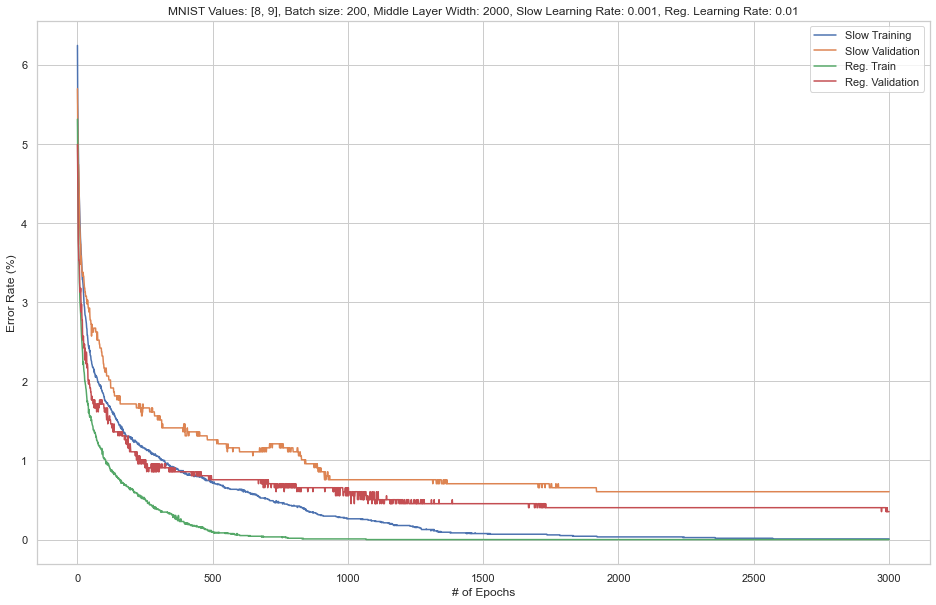

In [22]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
plot = sns.lineplot(data=df, dashes=False);
plot.set_title("MNIST Values: [8, 9], Batch size: 200, Middle Layer Width: 2000, Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("# of Epochs");
plt.ylabel("Error Rate (%)");